### IMPORT LIBRARIES

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

### GETTING KNOW ABOUT DATASET

In [29]:
df = pd.read_excel('E:\My Works\My Career\Projects\Data Analysis & Machine Learning\Machine Learning\Multiple Linear Regresssion\Combined Cycle Power Plant Energy Prediction\Folds5x2_pp.xlsx')

In [30]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### COLUMNS NAMES

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization

In [31]:
df.shape

(9568, 5)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [33]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [34]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### DATA ANALYSIS

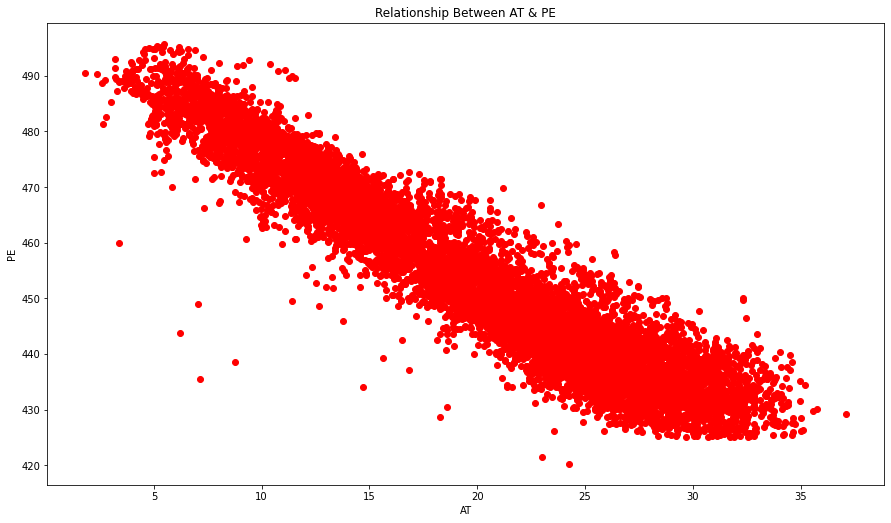

In [35]:
plt.figure(figsize=(15,8.5))

plt.scatter(df.AT,df.PE,color = 'red')
plt.title('Relationship Between AT & PE')

plt.xlabel('AT')
plt.ylabel('PE')
plt.show()

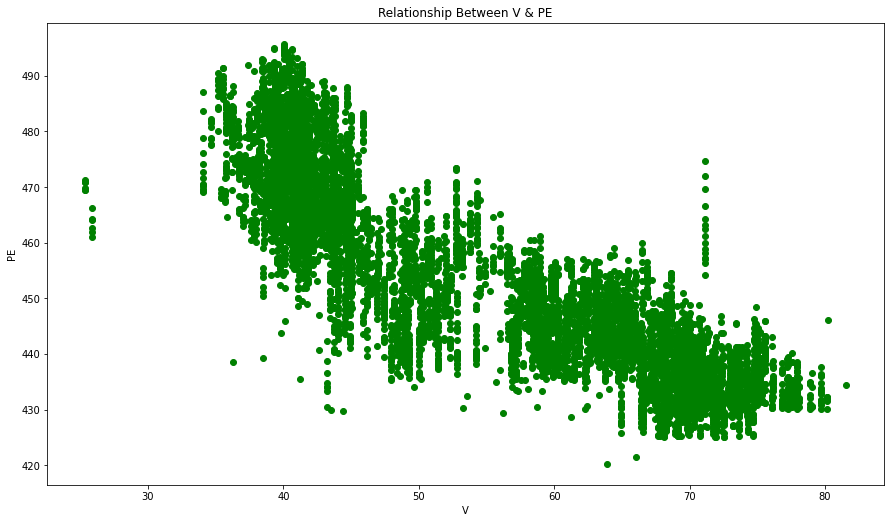

In [36]:
plt.figure(figsize=(15,8.5))

plt.scatter(df.V,df.PE,color = 'green')
plt.title('Relationship Between V & PE')

plt.xlabel('V')
plt.ylabel('PE')
plt.show()

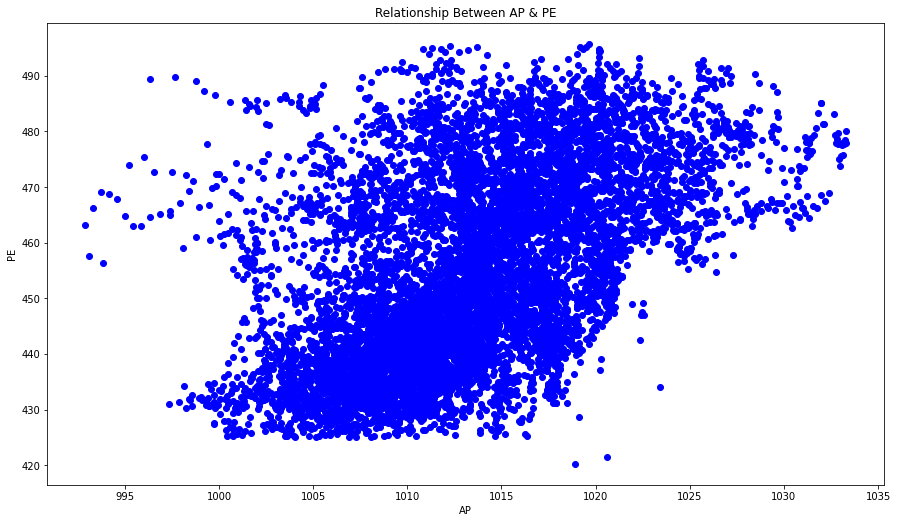

In [37]:
plt.figure(figsize=(15,8.5))

plt.scatter(df.AP,df.PE,color = 'blue')
plt.title('Relationship Between AP & PE')

plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

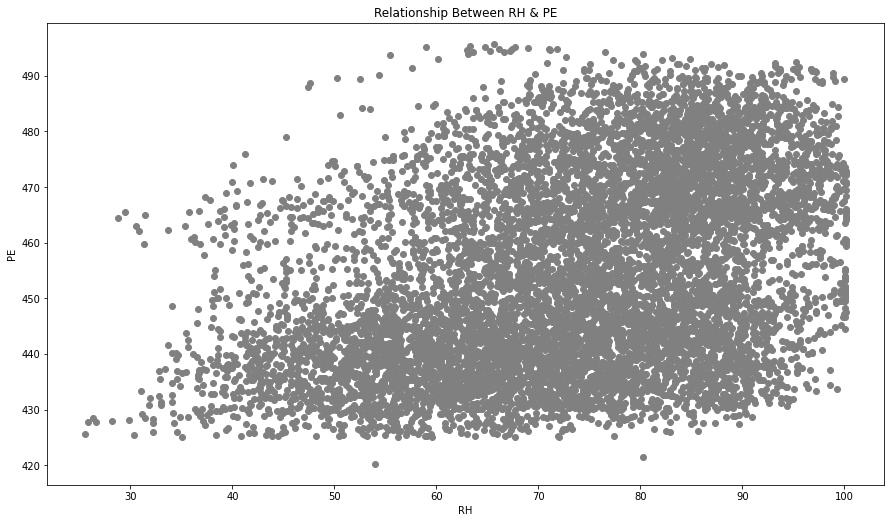

In [38]:
plt.figure(figsize=(15,8.5))

plt.scatter(df.RH,df.PE,color = 'gray')
plt.title('Relationship Between RH & PE')

plt.xlabel('RH')
plt.ylabel('PE')
plt.show()

### DATA PRE PROCESSING

#### DATA NORMALIZATION

In [43]:
x = df.drop(['PE'],axis = 1).values
y = df['PE'].values

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=2/5,random_state=0)

### MODEL BUILDING

In [45]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [46]:
print(model.coef_)

[-1.94472509 -0.24760347  0.07506161 -0.15503564]


In [47]:
print(model.intercept_)

441.3457275572486


In [48]:
y_pred = model.predict(x_test)

In [49]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

#### PREDTED VALUES VS ACTUAL VALUES

In [50]:
df_predict.head(10)

,Actual,Predicted
0,431.23,431.380099
1,460.01,458.693816
2,461.14,462.898805
3,445.90,448.629814
4,451.29,457.899927
5,432.68,429.699591
6,477.50,472.962966
7,459.68,456.579206
8,477.50,474.334219
9,444.99,446.431027


### MODEL EVALUATE

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.595033514909498
Mean Squared Error: 20.154407301667643
Root Mean Squared Error: 4.489366024470231


In [52]:
r2_score(y_test,y_pred)

0.9319844420474521

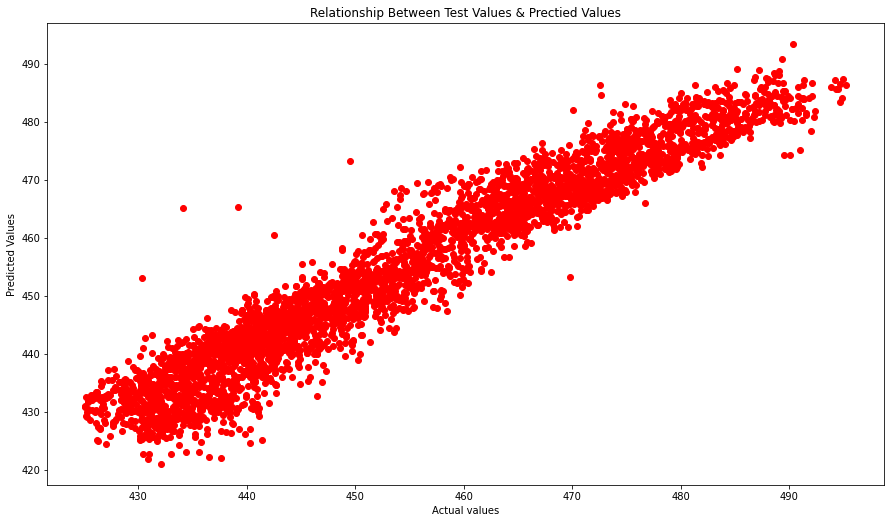

In [53]:
plt.figure(figsize=(15,8.5))

plt.scatter(y_test,y_pred, color='red')
plt.title('Relationship Between Test Values & Prectied Values')

plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

### CONCLUSION
>As Above Calculations RMSE ( Root Mean Squared Error ) Value is Higher Than 10% Of The Mean Petrol_Consumption. This means that our Model not did a much good job. but values are near so we can still consider as good model but not better

>And also r2 score is 0.93198 ( 93% ) its near to 100 so its mean this model did a good job

>And The Visualization display predicted values and Actual Values are have a strong bond. its mean our model is success.